In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/lesliee/Desktop/DS311 Group Project/DataDrivers/WIP Users/Leslie_WIP/cleaned_salary_data_states.xlsx'
df = pd.read_excel(file_path, sheet_name='cleaned_salary_data_states')

# Filter relevant columns and drop missing values
df_filtered = df[["PAID_WAGE_PER_YEAR", "EMPLOYER_NAME", "WORK_STATE", "WORK_STATE_ABBREVIATION", "JOB_TITLE", "JOB_TITLE_SUBGROUP"]].dropna()
data_related_keywords = ['data', 'analyst', 'scientist', 'engineer']
df_data_jobs = df[df['JOB_TITLE_SUBGROUP'].str.contains('|'.join(data_related_keywords), case=False, na=False)]



# Do specific sub-types of data-related jobs have higher or lower salaries than others?

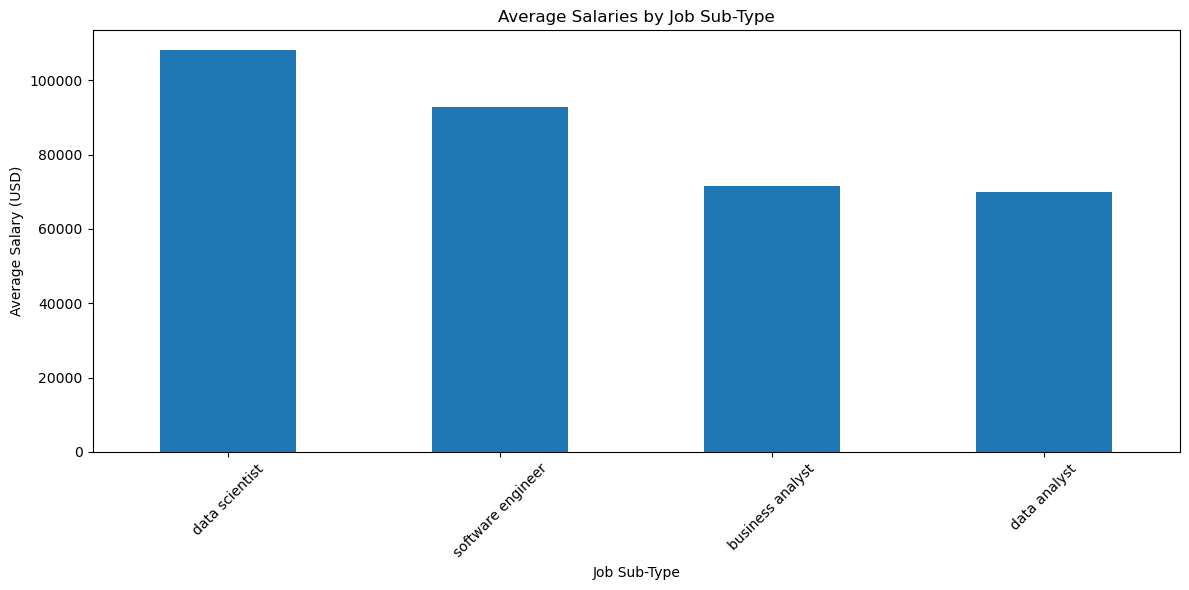

Exported: average_salaries_by_subtype.xlsx


In [14]:
# Calculate average salaries by job sub-type
avg_salaries_by_subtype = df_data_jobs.groupby("JOB_TITLE_SUBGROUP")["PAID_WAGE_PER_YEAR"].mean().sort_values(ascending=False)

# Plot average salaries by job sub-type
plt.figure(figsize=(12, 6))
avg_salaries_by_subtype.plot(kind='bar', title='Average Salaries by Job Sub-Type', xlabel='Job Sub-Type', ylabel='Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare a table for this analysis
avg_salaries_by_subtype_df = avg_salaries_by_subtype.reset_index()
avg_salaries_by_subtype_df.columns = ["Job Sub-Type", "Average Salary (USD)"]

# Export to Excel
avg_salaries_by_subtype_df.to_excel("average_salaries_by_subtype.xlsx", index=False)
print("Exported: average_salaries_by_subtype.xlsx")


# Which companies have the highest salaries for those sub-types?

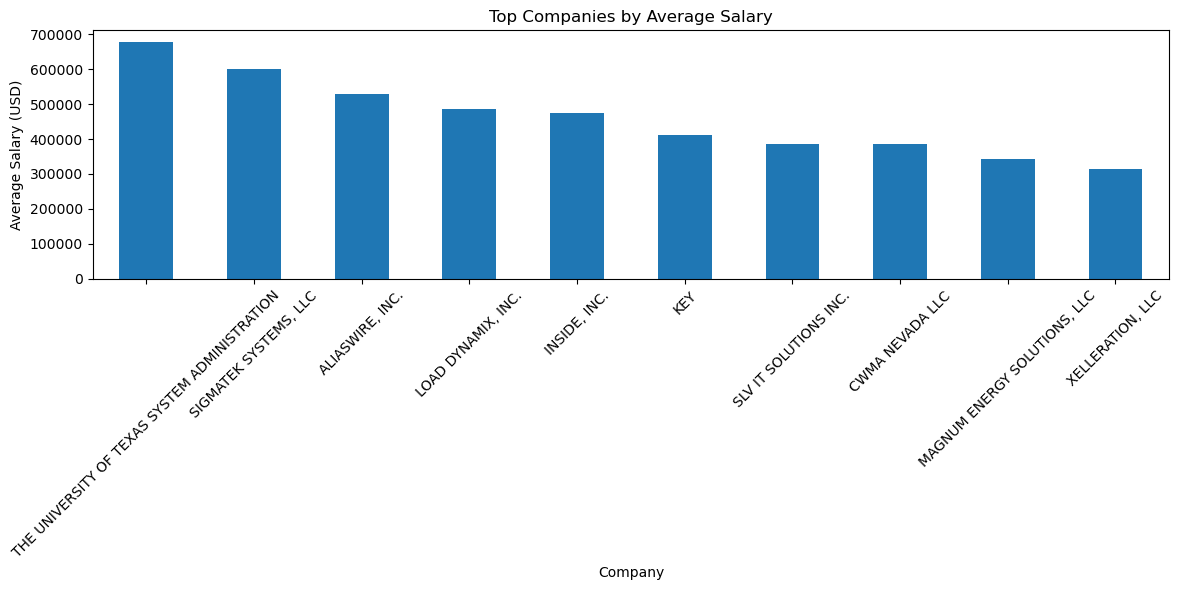

Data exported to average_salaries_by_subtype.xlsx
        Job Sub-Type  Average Salary (USD)
0     data scientist         108029.277440
1  software engineer          92760.435094
2   business analyst          71413.659989
3       data analyst          70064.974748


In [17]:
# Top 10 companies by average salary
top_companies = df_data_jobs.groupby("EMPLOYER_NAME")["PAID_WAGE_PER_YEAR"].mean().sort_values(ascending=False).head(10)

# Plot top companies by average salary
plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar', title='Top Companies by Average Salary', xlabel='Company', ylabel='Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare a table for top companies
top_companies_df = top_companies.reset_index()
top_companies_df.columns = ["Company", "Average Salary (USD)"]

# Save average salaries by job sub-type to an Excel file
avg_salaries_by_subtype_df.to_excel("average_salaries_by_subtype.xlsx", index=False)
print("Data exported to average_salaries_by_subtype.xlsx")

# Optionally, print the data to confirm
print(avg_salaries_by_subtype_df)


# Changes with location of the job?

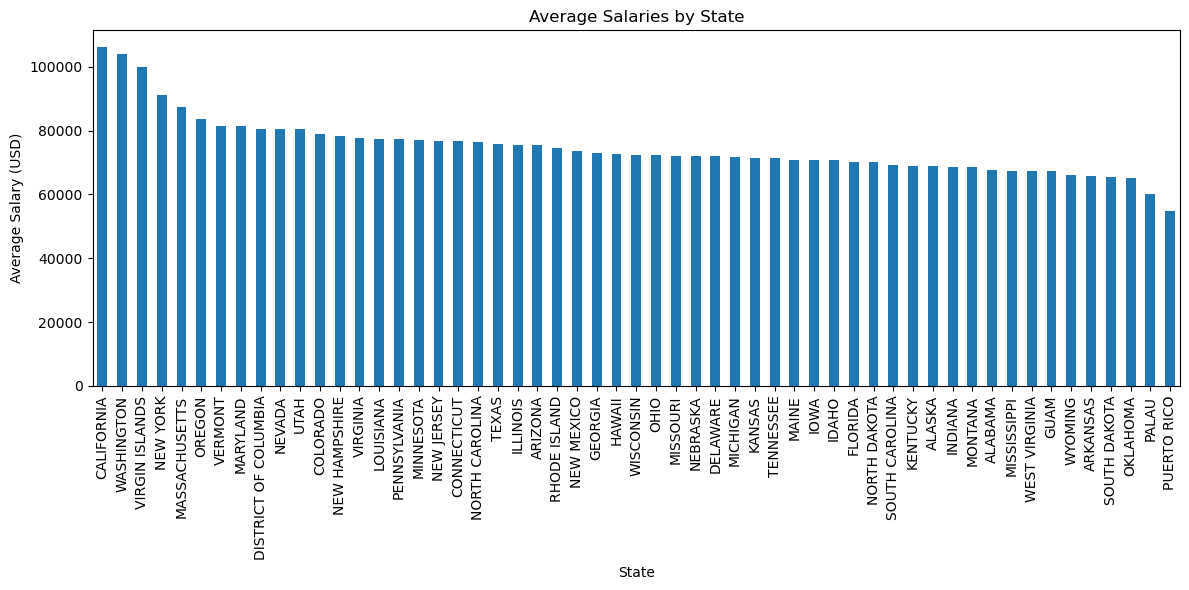

Exported: average_salaries_by_state.xlsx


In [15]:
# Average salaries by state
avg_salaries_by_state = df_data_jobs.groupby("WORK_STATE")["PAID_WAGE_PER_YEAR"].mean().sort_values(ascending=False)

# Plot average salaries by state
plt.figure(figsize=(12, 6))
avg_salaries_by_state.plot(kind='bar', title='Average Salaries by State', xlabel='State', ylabel='Average Salary (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prepare a table for average salaries by state
avg_salaries_by_state_df = avg_salaries_by_state.reset_index()
avg_salaries_by_state_df.columns = ["State", "Average Salary (USD)"]

# Export to Excel
avg_salaries_by_state_df.to_excel("average_salaries_by_state.xlsx", index=False)
print("Exported: average_salaries_by_state.xlsx")



# Will the answer change if I take standard of living into account?

/var/folders/6h/lg249dt14bq9ygh554ll961r0000gn/T/ipykernel_58233/3657024082.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_jobs.loc[:, 'COST_OF_LIVING'] = df_data_jobs['WORK_STATE'].map(cost_of_living)
/var/folders/6h/lg249dt14bq9ygh554ll961r0000gn/T/ipykernel_58233/3657024082.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_jobs.loc[:, 'ADJUSTED_SALARY'] = df_data_jobs['PAID_WAGE_PER_YEAR'] / df_data_jobs['COST_OF_LIVING']


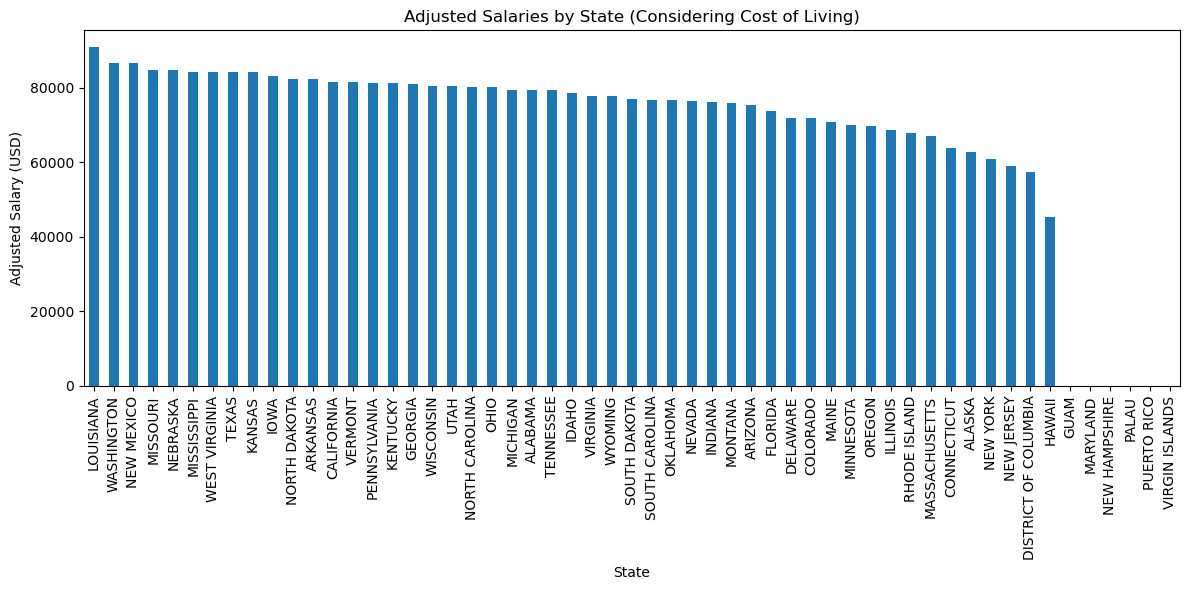

Exported: average_adjusted_salaries_by_state.xlsx


In [16]:
# Define cost of living index
cost_of_living = {
    'CALIFORNIA': 1.3, 'TEXAS': 0.9, 'NEW YORK': 1.5, 'ILLINOIS': 1.1, 
    'OREGON': 1.2, 'FLORIDA': 0.95, 'WASHINGTON': 1.2, 'GEORGIA': 0.9, 
    'MASSACHUSETTS': 1.3, 'PENNSYLVANIA': 0.95, 'OHIO': 0.9, 'ARIZONA': 1.0,
    'COLORADO': 1.1, 'NORTH CAROLINA': 0.95, 'VIRGINIA': 1.0, 'MICHIGAN': 0.9,
    'NEVADA': 1.05, 'NEW JERSEY': 1.3, 'MINNESOTA': 1.1, 'INDIANA': 0.9,
    'WISCONSIN': 0.9, 'MISSOURI': 0.85, 'TENNESSEE': 0.9, 'KENTUCKY': 0.85,
    'ALABAMA': 0.85, 'OKLAHOMA': 0.85, 'ARKANSAS': 0.8, 'SOUTH CAROLINA': 0.9,
    'LOUISIANA': 0.85, 'UTAH': 1.0, 'KANSAS': 0.85, 'CONNECTICUT': 1.2,
    'IOWA': 0.85, 'MISSISSIPPI': 0.8, 'NEBRASKA': 0.85, 'WEST VIRGINIA': 0.8,
    'NEW MEXICO': 0.85, 'IDAHO': 0.9, 'HAWAII': 1.6, 'MAINE': 1.0,
    'RHODE ISLAND': 1.1, 'MONTANA': 0.9, 'DELAWARE': 1.0, 'SOUTH DAKOTA': 0.85,
    'NORTH DAKOTA': 0.85, 'ALASKA': 1.1, 'WYOMING': 0.85, 'VERMONT': 1.0,
    'DISTRICT OF COLUMBIA': 1.4
}

# Adjust salaries for cost of living using .loc
df_data_jobs.loc[:, 'COST_OF_LIVING'] = df_data_jobs['WORK_STATE'].map(cost_of_living)
df_data_jobs.loc[:, 'ADJUSTED_SALARY'] = df_data_jobs['PAID_WAGE_PER_YEAR'] / df_data_jobs['COST_OF_LIVING']

# Average adjusted salaries by state
avg_adjusted_salaries = df_data_jobs.groupby("WORK_STATE")["ADJUSTED_SALARY"].mean().sort_values(ascending=False)

# Plot adjusted salaries by state
plt.figure(figsize=(12, 6))
avg_adjusted_salaries.plot(kind='bar', title='Adjusted Salaries by State (Considering Cost of Living)', xlabel='State', ylabel='Adjusted Salary (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prepare a table for adjusted salaries by state
avg_adjusted_salaries_df = avg_adjusted_salaries.reset_index()
avg_adjusted_salaries_df.columns = ["State", "Average Adjusted Salary (USD)"]

# Export to Excel
avg_adjusted_salaries_df.to_excel("average_adjusted_salaries_by_state.xlsx", index=False)
print("Exported: average_adjusted_salaries_by_state.xlsx")
